In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
auctions = pd.read_csv("data/auctions.csv.gzip", parse_dates=['date'])
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [167]:
#reduciendo el dataset
#auctions = auctions.iloc[0:200000]

In [168]:
auctions.memory_usage()

Index                     80
auction_type_id    156570552
country            156570552
date               156570552
device_id          156570552
platform           156570552
ref_type_id        156570552
source_id          156570552
dtype: int64

In [169]:
auctions.dtypes

auction_type_id           float64
country                     int64
date               datetime64[ns]
device_id                   int64
platform                    int64
ref_type_id                 int64
source_id                   int64
dtype: object

In [170]:
auctions.count()

auction_type_id           0
country            19571319
date               19571319
device_id          19571319
platform           19571319
ref_type_id        19571319
source_id          19571319
dtype: int64

In [171]:
auctions = auctions.drop('auction_type_id', axis=1)

In [172]:
auctions.describe()

,country,device_id,platform,ref_type_id,source_id
count,1.957132e+07,1.957132e+07,1.957132e+07,1.957132e+07,1.957132e+07
mean,6.333597e+18,4.599151e+18,1.205888e+00,2.235326e+00,6.857898e-01
std,3.016674e+09,2.667138e+18,4.043488e-01,2.426093e+00,1.416215e+00
min,6.333597e+18,1.138588e+14,1.000000e+00,1.000000e+00,0.000000e+00
25%,6.333597e+18,2.258716e+18,1.000000e+00,1.000000e+00,0.000000e+00
50%,6.333597e+18,4.616600e+18,1.000000e+00,1.000000e+00,0.000000e+00
75%,6.333597e+18,6.911427e+18,1.000000e+00,1.000000e+00,1.000000e+00
max,6.333597e+18,9.223339e+18,2.000000e+00,7.000000e+00,6.000000e+00


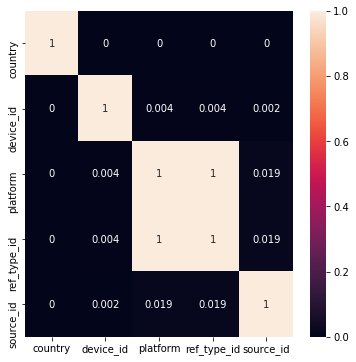

In [173]:
auctions_corr = auctions.corr().abs().round(3)
plt.figure(figsize=(6, 6))
sns.heatmap(auctions_corr, annot=True);

In [174]:
auctions['country'].value_counts()

6333597102633388268    19571319
Name: country, dtype: int64

In [175]:
auctions['platform'].value_counts()

1    15541825
2     4029494
Name: platform, dtype: int64

In [176]:
auctions['ref_type_id'].value_counts()

1    15541825
7     4029494
Name: ref_type_id, dtype: int64

In [177]:
auctions['source_id'].value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

In [178]:
auctions.loc[:,'platform'] = pd.Categorical(auctions['platform'])
auctions.loc[:,'ref_type_id'] = pd.Categorical(auctions['ref_type_id'])
auctions.loc[:,'source_id'] = pd.Categorical(auctions['source_id'])

In [179]:
auctions.describe()

,country,device_id
count,1.957132e+07,1.957132e+07
mean,6.333597e+18,4.599151e+18
std,3.016674e+09,2.667138e+18
min,6.333597e+18,1.138588e+14
25%,6.333597e+18,2.258716e+18
50%,6.333597e+18,4.616600e+18
75%,6.333597e+18,6.911427e+18
max,6.333597e+18,9.223339e+18


In [180]:
auctions.memory_usage()

Index                 80
country        156570552
date           156570552
device_id      156570552
platform        19571415
ref_type_id     19571415
source_id       19571519
dtype: int64

In [181]:
gb = auctions.groupby('device_id').size().nlargest(5)

In [182]:
top_auctions = auctions.loc[auctions['device_id'].isin(gb.keys())]

In [183]:
top_auctions['date'].max() - top_auctions['date'].min()

Timedelta('8 days 23:05:45.775220')

In [184]:
top_auctions.loc[:, 'date'] = top_auctions['date'].dt.date

D:\Program Files\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [185]:
top_auctions_ = top_auctions.groupby(['device_id', 'date']).size().to_frame().reset_index()
top_auctions_.set_index('device_id')
top_auctions_.columns = ['device_id', 'date', 'count']
top_auctions_

,device_id,date,count
0,633139769114048761,2019-03-05,2255
1,633139769114048761,2019-03-06,224
2,633139769114048761,2019-03-07,1877
3,633139769114048761,2019-03-08,1865
4,633139769114048761,2019-03-09,2054
5,633139769114048761,2019-03-10,5777
6,633139769114048761,2019-03-11,4829
7,633139769114048761,2019-03-12,4625
8,633139769114048761,2019-03-13,4256
9,5376802567578262905,2019-03-05,122


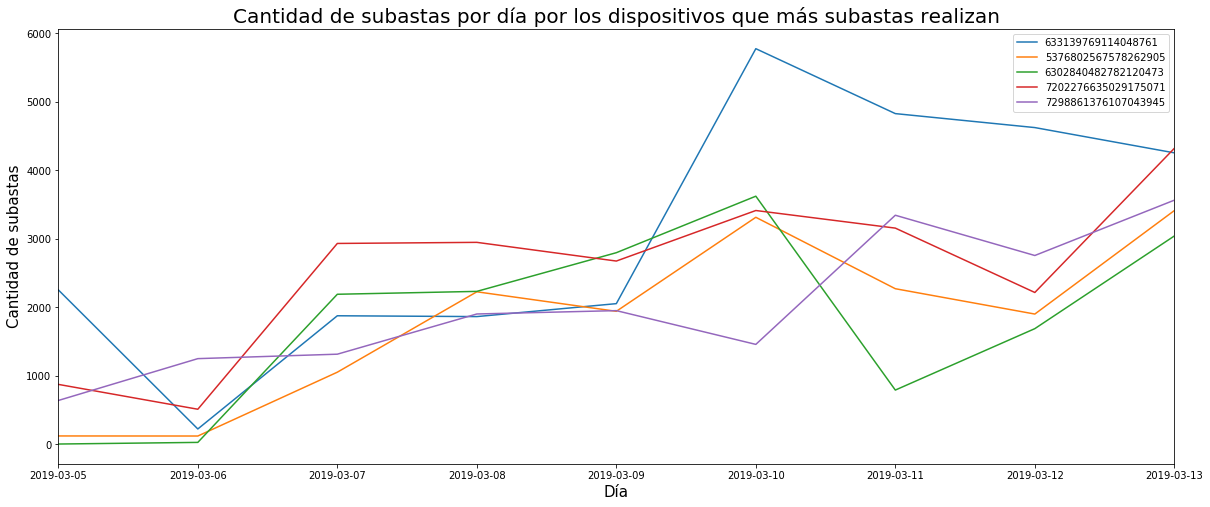

In [186]:
fig, ax = plt.subplots()
for key, grp in top_auctions_.groupby(['device_id']):
    ax = grp.plot(ax=ax, kind='line', x='date', y='count', label=key, figsize=(20,8))
plt.title("Cantidad de subastas por día por los dispositivos que más subastas realizan",size=20)
ax.set_ylabel('Cantidad de subastas',size=15);
ax.set_xlabel('Día',size=15);
plt.show()

In [187]:
auctions['hour'] = auctions['date'].dt.hour

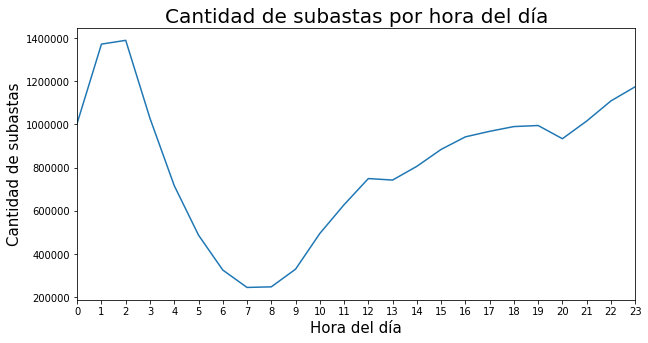

In [188]:
fig, ax = plt.subplots()
auctions.groupby('hour').size().plot(figsize=(10,5))
plt.title("Cantidad de subastas por hora del día", size=20)
ax.set_ylabel('Cantidad de subastas', size=15);
ax.set_xlabel('Hora del día', size=15);
plt.xticks(range(0,24,1));
plt.show()

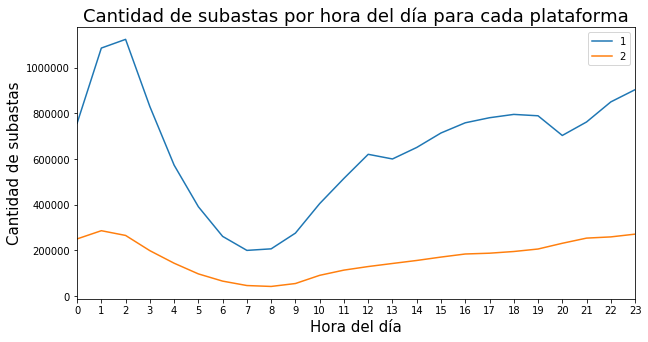

In [189]:
fig, ax = plt.subplots()
gb = auctions.groupby(['platform'])
for key, grp in gb:
    grp.groupby('hour').size().plot(ax=ax, kind='line', label=key, figsize=(10,5))
plt.title("Cantidad de subastas por hora del día para cada plataforma", size=18)
plt.legend()
ax.set_ylabel('Cantidad de subastas', size=15);
ax.set_xlabel('Hora del día', size=15);
plt.xticks(range(0,24,1));
plt.show()

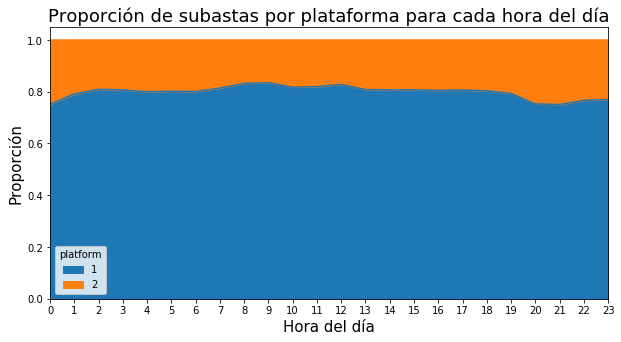

In [190]:
gb = auctions.groupby(['hour', 'platform']).size()
percentages = gb.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
percentages.columns = ['hour', 'platform', 'freq']
fig, ax = plt.subplots()
percentages.pivot_table(index='hour', columns='platform', values='freq').plot(ax=ax, kind='area', figsize=(10, 5))
plt.title('Proporción de subastas por plataforma para cada hora del día', size=18)
ax.set_ylabel('Proporción', size=15)
ax.set_xlabel('Hora del día', size=15)
plt.xticks(range(0,24,1));
plt.show()

**Tiempo promedio entre dos apariciones de un mismo dispositivo**

In [191]:
duplicate_auctions = auctions.groupby('device_id').filter(lambda x: len(x) > 1)
duplicate_auctions_ = duplicate_auctions.groupby('device_id').agg({'date': ['min', 'max'], 'device_id': 'size'}).reset_index()
duplicate_auctions_['mean_time'] = (duplicate_auctions_['date']['max'] - duplicate_auctions_['date']['min']) / duplicate_auctions_['device_id']['size']
duplicate_auctions_.columns = ['device_id', 'min_date', 'max_date', 'appearences', 'mean_time']
duplicate_auctions_['mean_time'].mean()

Timedelta('0 days 07:04:36.960219')

In [192]:
df = auctions.groupby('device_id').agg('size').reset_index()
df.columns = ['device_id', 'total_count']
df = pd.merge(df, auctions, on='device_id')
df = df.drop(['country', 'date', 'platform', 'ref_type_id', 'hour'], axis=1)
df2 = auctions.groupby(['device_id', 'source_id']).agg('size').reset_index()
df2.columns = ['device_id', 'source_id', 'single_count']
df3 = pd.merge(df, df2, on=['device_id', 'source_id'], how='right')
df3 = df3.drop_duplicates()
df3.sort_values("single_count", axis = 0, ascending = False, inplace = True)

In [ ]:
top_auction_source_count = df3.groupby('device_id').first()['single_count'].sum()
total_auction_count = df3['total_count'].sum()
other_auction_count = total_auction_count - top_auction_source_count
top_auction_perc = round((top_auction_source_count / total_auction_count) * 100, 2)
other_auction_perc = round((other_auction_count / total_auction_count) * 100, 2)

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

labels = 'De la fuente con más apariciones', 'De otras fuentes'
sizes = [top_auction_perc, other_auction_perc]
colors = ['#ff4444', '#44bbff']
explode = (0, 0)
 
patches, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
ax.set_title("Proveniencia de las subastas para cada id", size=20)
plt.setp(autotexts, size=18, weight="bold")
plt.setp(texts, size=16)
plt.show()